# Computational Simulation of Equivalence Class Formation Using the go/no-go Procedure with Compound Stimuli

### Abstract
Research about equivalence has commonly utilized human participants as experimental subjects. More recently, computational models have been capable of reproducing performances observed in experiments with humans. The computational model often utilized is called RELNET, and it simulates training and testing trials of conditional relations using the matching-to-sample procedure (MTS). The differentiation between sample stimulus and comparison stimuli, indispensable in MTS, implies operational difficulties for simulations. For this reason, new studies seek to utilize alternative procedures to MTS, which do not differentiate the functions of the antecedent stimuli. This work evaluated the possibility of developing a new computational model to simulate equivalence class formation using the go/no-go procedure with compound stimuli. In Experiment 1, artificial neural networks were utilized to simulate training of the AB and BC relations as well as the testing of the AC relation. The results showed that four out of six runs demonstrated equivalence class formation. Experiment 2 evaluated whether the additional class training performed in Experiment 1, which was analogous to the simulation of pre-experimental experience of human participants, would be essential for simulating the establishment of equivalence classes. It was found that it was not possible to simulate equivalence class formation without the additional class training. Altogether, the experiments show that it is possible to simulate equivalence class formation using the go/no-go procedure with compound stimuli and that it is necessary to conduct additional class training. The model developed is, therefore, an alternative to RELNET for the study of equivalence relations using computational simulations.

[article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4960284/pdf/40732_2016_Article_184.pdf)

In [12]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import csv

%matplotlib inline
plt.style.use('seaborn')

# TensorFlow replica

[XOR example (simplest)](https://medium.com/@jaschaephraim/elementary-neural-networks-with-tensorflow-c2593ad3d60b)
[MNIST example](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network_raw.ipynb)

In [13]:
train_1_X=[
    [0.,0.,0.,1.,0.,1.,0.,0.,0.],# 0 0 0 1 0 1 0 0 0 
    [0.,1.,0.,0.,0.,1.,0.,0.,0.],# 0 1 0 0 0 1 0 0 0
    [0.,1.,0.,1.,0.,0.,0.,0.,0.],# 0 1 0 1 0 0 0 0 0
    [1.,0.,0.,0.,0.,0.,0.,1.,0.],# 1 0 0 0 0 0 0 1 0  
    [1.,0.,1.,0.,0.,0.,0.,0.,0.],# 1 0 1 0 0 0 0 0 0 
    [0.,0.,0.,0.,1.,0.,0.,1.,0.],# 0 0 0 0 1 0 0 1 0 
    [0.,0.,0.,0.,0.,0.,1.,1.,0.],# 0 0 0 0 0 0 1 1 0 
    [0.,0.,1.,0.,0.,0.,0.,0.,1.],# 0 0 1 0 0 0 0 0 1
    [0.,0.,0.,0.,0.,0.,0.,1.,1.],# 0 0 0 0 0 0 0 1 1 
    [0.,0.,1.,0.,0.,0.,1.,0.,0.],# 0 0 1 0 0 0 1 0 0
    [0.,0.,1.,0.,1.,0.,0.,0.,0.] # 0 0 1 0 1 0 0 0 0 
]

train_1_y=[1,1,1,1,0,1,0,1,0,1,0] 

test_1_X=[
    [1.,0.,0.,0.,1.,0.,0.,0.,0.],
    [1.,0.,0.,0.,0.,0.,1.,0.,0.],
    [0.,0.,0.,0.,0.,0.,1.,0.,1.],
    [0.,0.,0.,0.,1.,0.,0.,0.,1.]
]

test_1_y=[1,0,1,0]

train_2_X=[
    [1.,0.,0.,0.,1.,0.],# 1 0 0 0 1 0
    [1.,1.,0.,0.,0.,0.],# 1 1 0 0 0 0
    [1.,1.,0.,0.,0.,0.],# 0 0 1 0 1 0
    [0.,0.,0.,1.,1.,0.],# 0 0 0 1 1 0
    [0.,1.,0.,0.,0.,1.],# 0 1 0 0 0 1
    [0.,0.,0.,0.,1.,1.],# 0 0 0 0 1 1
    [0.,1.,0.,1.,0.,0.],# 0 1 0 1 0 0
    [0.,1.,1.,0.,0.,0.] # 0 1 1 0 0 0 
]

train_2_y=[1,0,1,0,1,0,1,0]

test_2_X=[
    [1.,0.,1.,0.,0.,0.],# 1 0 1 0 0 0
    [1.,0.,0.,1.,0.,0.],# 1 0 0 1 0 0 
    [0.,0.,0.,1.,0.,1.],# 0 0 0 1 0 1
    [0.,0.,1.,0.,0.,1.],# 0 0 1 0 0 1
]

test_2_y=[1,0,1,0]


In [14]:
def predict_net(train_in,test_in,train_out_list,hidden_units=4, report=False, max_epochs=20000):

    #variables
    input_units=len(train_in[0])
    train_out=[[float(i)]for i in train_out_list]#train_1_y
    output_units=1

    # tf session preparation
    x  = tf.placeholder("float", shape=[None, input_units])# Not in original code
    y_ = tf.placeholder("float", shape=[None, output_units])# Not in original code

    w1 = tf.Variable(tf.random_normal([input_units, hidden_units]))
    b1 = tf.Variable(tf.zeros([hidden_units]))

    w2 = tf.Variable(tf.random_normal([hidden_units, output_units]))
    b2 = tf.Variable(tf.zeros([output_units]))

    out1 = tf.sigmoid(tf.add(tf.matmul(x, w1), b1))# train_in
    out2 = tf.sigmoid(tf.add(tf.matmul(out1, w2), b2))

    error = tf.subtract(y_, out2)
    mse = tf.reduce_mean(tf.square(error))

    train = tf.train.GradientDescentOptimizer(0.3).minimize(mse)

    # Trainning session

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    err, target = 1, 0.0025
    epoch = 0
    mserr=[]

    if report: 
        strt=time.time()

    while err > target and epoch < max_epochs:
        epoch += 1
        err, _ = sess.run([mse, train],feed_dict={x:train_in, y_:train_out})
        mserr.append(err)

    if report: 
        converg_time=time.time()-strt
        print("epoch:", epoch, "mse:", err, "time:", converg_time)

    train_prediction=out2.eval(feed_dict={x: train_in},session=sess)
    test_prediction=out2.eval(feed_dict={x: test_in},session=sess)

    return mserr,train_prediction,test_prediction

In [ ]:
iteraciones=10000
#n_reports=20

n_iter_train_1=[]
predict_train_1=[]
predict_test_1=[]


n_iter_train_2=[]
predict_train_2=[]
predict_test_2=[]

converg_times=[]

filename="TF_replicas"
# with open(''.join(["Results_1/",filename,".csv"]), 'wb') as f:# 'wb' are the second parameter sugested values
#     writer = csv.writer(f)
#     writer.writerow(["exp_1_n_iter".encode(),
#                      "exp_1_pred_train_1".encode(),
#                      "exp_1_pred_train_2".encode(),
#                      "exp_1_pred_train_3".encode(),
#                      "exp_1_pred_train_4".encode(),
#                      "exp_1_pred_train_5".encode(),
#                      "exp_1_pred_train_6".encode(),
#                      "exp_1_pred_train_7".encode(),
#                      "exp_1_pred_train_8".encode(),
#                      "exp_1_pred_train_9".encode(),
#                      "exp_1_pred_train_10".encode(),
#                      "exp_1_pred_train_11".encode(),
#                      "exp_1_pred_test_1".encode(),
#                      "exp_1_pred_test_2".encode(),
#                      "exp_1_pred_test_3".encode(),
#                      "exp_1_pred_test_4".encode(),
#                      "exp_2_final_loss".encode(),
#                      "exp_2_n_iter".encode(),
#                      "exp_2_pred_train_1".encode(),
#                      "exp_2_pred_train_2".encode(),
#                      "exp_2_pred_train_3".encode(),
#                      "exp_2_pred_train_4".encode(),
#                      "exp_2_pred_train_5".encode(),
#                      "exp_2_pred_train_6".encode(),
#                      "exp_2_pred_train_7".encode(),
#                      "exp_2_pred_train_8".encode(),
#                      "exp_2_pred_test_1".encode(),
#                      "exp_2_pred_test_2".encode(),
#                      "exp_2_pred_test_3".encode(),
#                      "exp_2_pred_test_4".encode()
#                     ])
        
for corrida in range(iteraciones):
    strt_time=time.time()
    err_list_1, pred_train_1,pred_test_1=predict_net(train_1_X,test_1_X,train_1_y)
    err_list_2, pred_train_2,pred_test_2=predict_net(train_2_X,test_2_X,train_2_y)    

    iter_vals=[item for sublist in [[len(err_list_1)],
                                    [float(p) for p in pred_train_1],
                                    [float(p) for p in pred_test_1],
                                    [err_list_2[-1]],
                                    [len(err_list_2)],
                                    [float(p) for p in pred_train_2],
                                    [float(p) for p in pred_test_2],
                                   ] for item in sublist]


#     converg_times.append(end_time-strt_time)

    with open(''.join(["Results_1/",filename,".csv"]), 'a') as f:# 'wb' are the second parameter sugested values
        writer = csv.writer(f)
        writer.writerow(iter_vals)
    
    end_time=time.time()
    print("iter: ", str(corrida), "| time: ", str(end_time-strt_time))


#     if i %(iteraciones/n_reports)==0:
#         np.savetxt("Results_1/PSO.csv",np.array(best_nCorrds_mIters))
#         with open("Results_1/PSO_best_part.csv", 'wb') as f:
#             writer = csv.writer(f)
#             [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

# np.savetxt("Results_1/PSO.csv",np.array(best_nCorrds_mIters))

iter:  0 | time:  44.0470027923584
iter:  1 | time:  42.026429891586304
iter:  2 | time:  41.24965190887451
iter:  3 | time:  45.60592555999756
iter:  4 | time:  41.986907720565796
iter:  5 | time:  42.819883823394775
iter:  6 | time:  42.69596886634827
iter:  7 | time:  42.24619793891907
iter:  8 | time:  41.54624319076538
iter:  9 | time:  41.82922148704529
iter:  10 | time:  42.71876859664917
iter:  11 | time:  42.405431270599365
iter:  12 | time:  44.759929895401
iter:  13 | time:  42.13695430755615
iter:  14 | time:  45.26703143119812
iter:  15 | time:  42.67394757270813
iter:  16 | time:  42.71244740486145
iter:  17 | time:  44.11488676071167
iter:  18 | time:  45.123584032058716
iter:  19 | time:  41.960901737213135
iter:  20 | time:  44.12057185173035
iter:  21 | time:  46.65885519981384
iter:  22 | time:  43.351662397384644
iter:  23 | time:  43.07923436164856
iter:  24 | time:  42.365734815597534
iter:  25 | time:  47.85464859008789
iter:  26 | time:  47.897841691970825
iter:

iter:  218 | time:  62.98193955421448
iter:  219 | time:  64.22554183006287
iter:  220 | time:  66.29483199119568
iter:  221 | time:  63.786654472351074
iter:  222 | time:  65.55808019638062
iter:  223 | time:  71.99725437164307
iter:  224 | time:  67.35212826728821
iter:  225 | time:  66.18624353408813
iter:  226 | time:  67.38292622566223
iter:  227 | time:  66.26107740402222
iter:  228 | time:  66.86906599998474
iter:  229 | time:  68.43150734901428
iter:  230 | time:  66.68200445175171
iter:  231 | time:  68.2176992893219
iter:  232 | time:  66.96712160110474
iter:  233 | time:  67.65268278121948
iter:  234 | time:  66.26059794425964
iter:  235 | time:  67.1281156539917
iter:  236 | time:  68.25903391838074
iter:  237 | time:  68.73580312728882
iter:  238 | time:  69.22849702835083
iter:  239 | time:  68.50327754020691
iter:  240 | time:  69.49725151062012
iter:  241 | time:  71.92103433609009
iter:  242 | time:  67.20981097221375
iter:  243 | time:  68.33606171607971
iter:  244 | 

# Results

In [2]:
dat=pd.read_csv("Results_1/TF_replicas.csv", 
                header=None, 
                names=(["exp_1_n_iter",
                        "exp_1_pred_train_1",
                        "exp_1_pred_train_2",
                        "exp_1_pred_train_3",
                        "exp_1_pred_train_4",
                        "exp_1_pred_train_5",
                        "exp_1_pred_train_6",
                        "exp_1_pred_train_7",
                        "exp_1_pred_train_8",
                        "exp_1_pred_train_9",
                        "exp_1_pred_train_10",
                        "exp_1_pred_train_11",
                        "exp_1_pred_test_1",
                        "exp_1_pred_test_2",
                        "exp_1_pred_test_3",
                        "exp_1_pred_test_4",
                        "exp_2_final_loss",
                        "exp_2_n_iter",
                        "exp_2_pred_train_1",
                        "exp_2_pred_train_2",
                        "exp_2_pred_train_3",
                        "exp_2_pred_train_4",
                        "exp_2_pred_train_5",
                        "exp_2_pred_train_6",
                        "exp_2_pred_train_7",
                        "exp_2_pred_train_8",
                        "exp_2_pred_test_1",
                        "exp_2_pred_test_2",
                        "exp_2_pred_test_3",
                        "exp_2_pred_test_4",
                       ]))# , sep=";" # para bases en español #_hid_4_1
#dat=pd.read_csv("Results_1/test_hid_4_1.csv")# , sep=";" # para bases en español #_hid_4_1
list(dat.columns)

['exp_1_n_iter',
 'exp_1_pred_train_1',
 'exp_1_pred_train_2',
 'exp_1_pred_train_3',
 'exp_1_pred_train_4',
 'exp_1_pred_train_5',
 'exp_1_pred_train_6',
 'exp_1_pred_train_7',
 'exp_1_pred_train_8',
 'exp_1_pred_train_9',
 'exp_1_pred_train_10',
 'exp_1_pred_train_11',
 'exp_1_pred_test_1',
 'exp_1_pred_test_2',
 'exp_1_pred_test_3',
 'exp_1_pred_test_4',
 'exp_2_final_loss',
 'exp_2_n_iter',
 'exp_2_pred_train_1',
 'exp_2_pred_train_2',
 'exp_2_pred_train_3',
 'exp_2_pred_train_4',
 'exp_2_pred_train_5',
 'exp_2_pred_train_6',
 'exp_2_pred_train_7',
 'exp_2_pred_train_8',
 'exp_2_pred_test_1',
 'exp_2_pred_test_2',
 'exp_2_pred_test_3',
 'exp_2_pred_test_4']

In [ ]:
dat["exp_1_n_iter"].plot.density(figsize=(12,8),alpha=0.6)

/home/yagwar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=20000, right=20000
  'left=%s, right=%s') % (left, right))


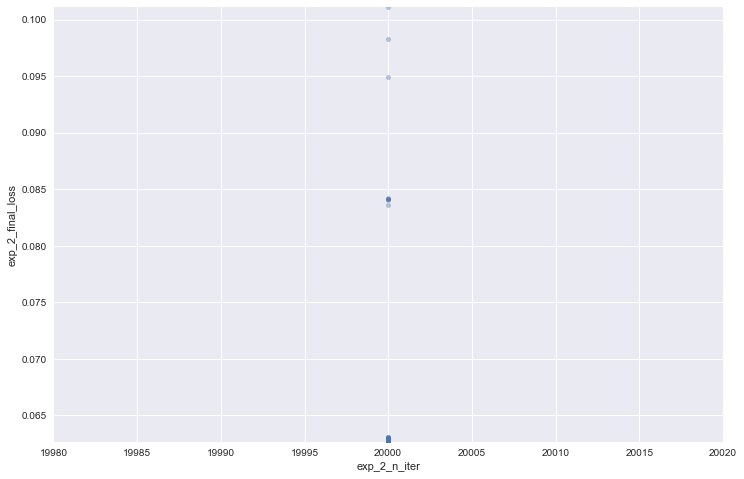

In [3]:
dat.plot.scatter(
    x='exp_2_n_iter',
    y='exp_2_final_loss',
    ylim=(dat["exp_2_final_loss"].min(),dat["exp_2_final_loss"].max()),
    xlim=(dat["exp_2_n_iter"].min(),dat["exp_2_n_iter"].max()),
    figsize=(12,8),
    alpha=0.4
)
#dat['exp_1_loss'].plot.hist()

In [4]:
dat["exp_2_final_loss"].describe()

count    716.000000
mean       0.063079
std        0.002995
min        0.062659
25%        0.062704
50%        0.062746
75%        0.062787
max        0.101124
Name: exp_2_final_loss, dtype: float64

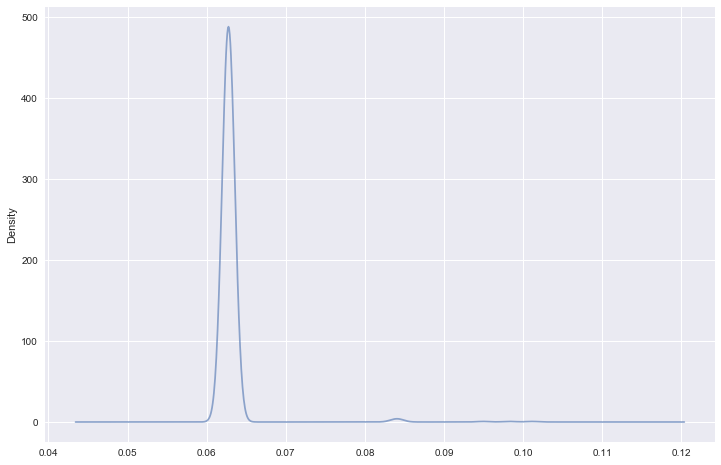

In [5]:
dat["exp_2_final_loss"].plot.density(figsize=(12,8),alpha=0.6)

In [6]:
dat[["exp_1_pred_test_1","exp_1_pred_test_2","exp_1_pred_test_3","exp_1_pred_test_4"]].describe()

,exp_1_pred_test_1,exp_1_pred_test_2,exp_1_pred_test_3,exp_1_pred_test_4
count,716.000000,716.000000,716.000000,716.000000
mean,0.727739,0.364369,0.729881,0.362431
std,0.298040,0.302610,0.296208,0.306978
min,0.013921,0.011432,0.016078,0.023205
25%,0.566155,0.113903,0.557749,0.113468
50%,0.888031,0.236717,0.890232,0.219712
75%,0.946982,0.601497,0.946929,0.607984
max,0.989993,0.978444,0.992724,0.980803


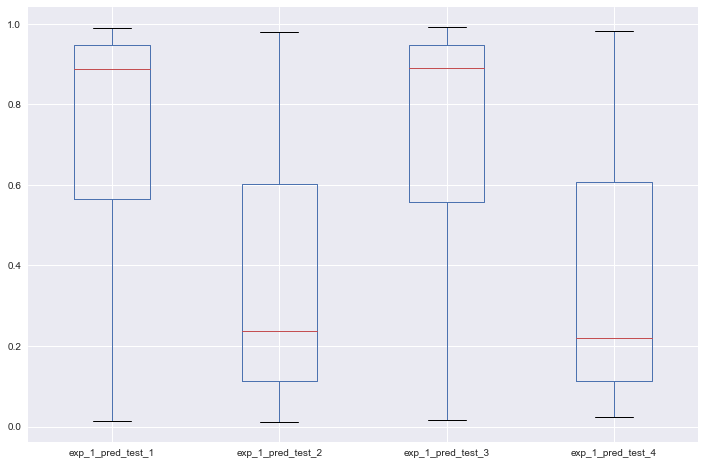

In [7]:
dat[["exp_1_pred_test_1","exp_1_pred_test_2","exp_1_pred_test_3","exp_1_pred_test_4"]].plot(kind="box", figsize=(12,8))#, alpha=0.6)

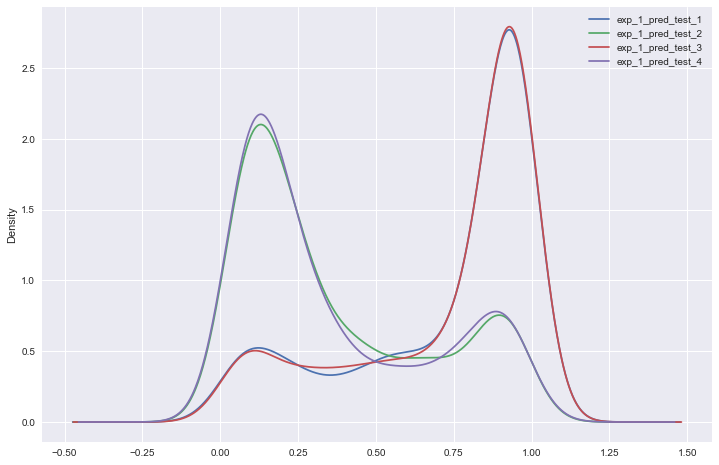

In [8]:
dat[["exp_1_pred_test_1",
     "exp_1_pred_test_2",
     "exp_1_pred_test_3",
     "exp_1_pred_test_4"
    ]].plot.density(figsize=(12,8))

In [9]:
dat[["exp_2_pred_test_1","exp_2_pred_test_2","exp_2_pred_test_3","exp_2_pred_test_4"]].describe()

,exp_2_pred_test_1,exp_2_pred_test_2,exp_2_pred_test_3,exp_2_pred_test_4
count,716.000000,716.000000,716.000000,716.000000
mean,0.340030,0.906320,0.541640,0.019880
std,0.255888,0.129557,0.313162,0.055906
min,0.003194,0.196046,0.010035,0.000150
25%,0.119106,0.894532,0.246099,0.003359
50%,0.278815,0.964343,0.569320,0.006960
75%,0.523083,0.980657,0.837128,0.014885
max,0.956382,0.999452,0.998653,0.741406


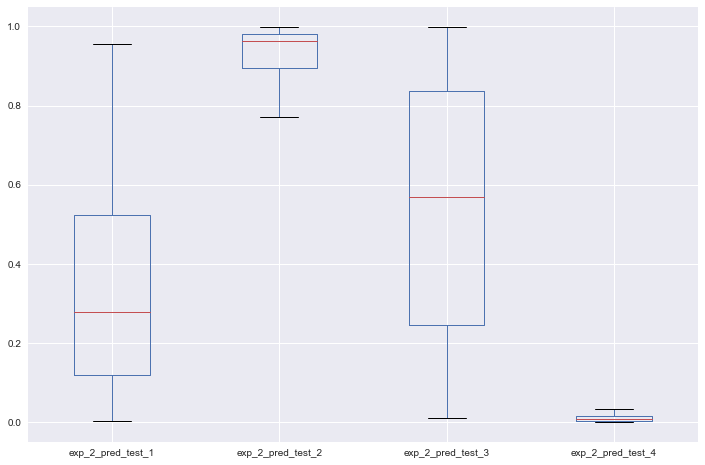

In [10]:
dat[["exp_2_pred_test_1","exp_2_pred_test_2","exp_2_pred_test_3","exp_2_pred_test_4"]].plot(kind="box", figsize=(12,8))#, alpha=0.6)

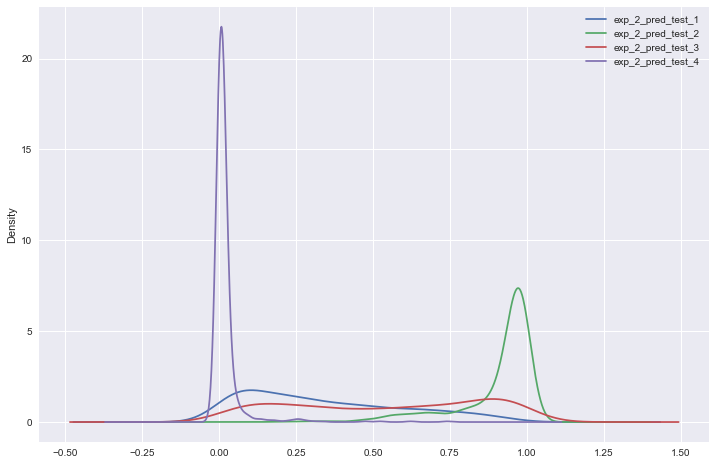

In [11]:
dat[["exp_2_pred_test_1",
     "exp_2_pred_test_2",
     "exp_2_pred_test_3",
     "exp_2_pred_test_4"
    ]].plot.density(figsize=(12,8))